In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# ! pip install sdv

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np

import commonfunc

In [5]:
data_set_path = "./sampled_data_csv_100/"

# Microbiologyevents

## Data Process

### Read samples

In [6]:
microbiologyevents_df = commonfunc.read_csv_no_rowid(data_set_path + "microbiologyevents.csv")

In [7]:
microbiologyevents_df.head()

,subject_id,hadm_id,chartdate,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
0,87197,176931,2109-11-16,2109-11-16 08:45:00,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87197,176931,2109-11-16,2109-11-16 09:00:00,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87197,176931,2109-11-16,2109-11-16 23:01:00,70079,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87197,176931,2109-11-16,2109-11-16 23:01:00,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87197,176931,2109-11-16,2109-11-16 23:01:00,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data preproces

In [8]:
# Drop some columns. This cell must be below of Deal with null values
microbiologyevents_df.drop(['chartdate'], axis=1, inplace=True)

#### Deal with missing values

In [10]:
commonfunc.nan_count(microbiologyevents_df)

Total columns: 14
Total rows: 1519
--------------
subject_id               0
hadm_id                  0
charttime              171
spec_itemid              0
spec_type_desc           0
org_itemid             753
org_name               753
isolate_num            753
ab_itemid              865
ab_name                865
dilution_text          872
dilution_comparison    872
dilution_value         872
interpretation         865
dtype: int64


In [11]:
# Drop some null value
microbiologyevents_df.dropna(subset=['subject_id', 'hadm_id', 'spec_itemid', 'charttime'], inplace=True, axis=0)

In [13]:
commonfunc.nan_count(microbiologyevents_df)

Total columns: 14
Total rows: 1348
--------------
subject_id               0
hadm_id                  0
charttime                0
spec_itemid              0
spec_type_desc           0
org_itemid             702
org_name               702
isolate_num            702
ab_itemid              798
ab_name                798
dilution_text          805
dilution_comparison    805
dilution_value         805
interpretation         798
dtype: int64


In [14]:
# # Deal with null values
# microbiologyevents_df['charttime'].fillna(microbiologyevents_df['chartdate'], inplace=True)

# microbiologyevents_df['org_itemid'].fillna(value=0, inplace=True)
# microbiologyevents_df['isolate_num'].fillna(value=0, inplace=True)
# microbiologyevents_df['ab_itemid'].fillna(value=0, inplace=True)

# microbiologyevents_df['org_name'].fillna(value='Na', inplace=True)
# microbiologyevents_df['ab_name'].fillna(value='Na', inplace=True)
# microbiologyevents_df['dilution_comparison'].fillna(value='Na', inplace=True)
# microbiologyevents_df['org_name'].fillna(value='Na', inplace=True)

# microbiologyevents_df['dilution_value'].fillna(value=999, inplace=True)

#### Deal with missing values

In [15]:
microbiologyevents_df.dtypes

subject_id               int64
hadm_id                  int64
charttime               object
spec_itemid              int64
spec_type_desc          object
org_itemid             float64
org_name                object
isolate_num            float64
ab_itemid              float64
ab_name                 object
dilution_text           object
dilution_comparison     object
dilution_value         float64
interpretation          object
dtype: object

In [16]:
microbiologyevents_df['charttime'] = pd.to_datetime(microbiologyevents_df['charttime'])
# microbiologyevents_df['spec_itemid'] = microbiologyevents_df['spec_itemid'].astype(int)
# microbiologyevents_df['org_itemid'] = microbiologyevents_df['org_itemid'].astype(int)
# microbiologyevents_df['isolate_num'] = microbiologyevents_df['isolate_num'].astype(int)
# microbiologyevents_df['ab_itemid'] = microbiologyevents_df['ab_itemid'].astype(int)

In [17]:
microbiologyevents_df.dtypes

subject_id                      int64
hadm_id                         int64
charttime              datetime64[ns]
spec_itemid                     int64
spec_type_desc                 object
org_itemid                    float64
org_name                       object
isolate_num                   float64
ab_itemid                     float64
ab_name                        object
dilution_text                  object
dilution_comparison            object
dilution_value                float64
interpretation                 object
dtype: object

In [18]:
microbiologyevents_df.columns

Index(['subject_id', 'hadm_id', 'charttime', 'spec_itemid', 'spec_type_desc',
       'org_itemid', 'org_name', 'isolate_num', 'ab_itemid', 'ab_name',
       'dilution_text', 'dilution_comparison', 'dilution_value',
       'interpretation'],
      dtype='object')

---

## Build model

### Set constraints

In [19]:
from sdv.constraints import FixedCombinations

fixed_org_itemid_org_name_constraint = FixedCombinations(
    column_names=['org_itemid', 'org_name']
)
fixed_itemid_value_valueuom_constraint = FixedCombinations(
    column_names=['spec_itemid', 'spec_type_desc']
)
fixed_dilution_constraint = FixedCombinations(
    column_names=['ab_itemid', 'ab_name', 'dilution_text', 'dilution_comparison', 'dilution_value']
)

In [20]:
constraints = [fixed_org_itemid_org_name_constraint, fixed_itemid_value_valueuom_constraint, fixed_dilution_constraint]

In [22]:
train_data = microbiologyevents_df
best_model = commonfunc.build_model(constraints=constraints, train_data=train_data)

Strat training ...
Tabular Preset


Sampling rows: 100%|██████████| 1348/1348 [00:00<00:00, 12917.76it/s]


Gaussian Copula


Sampling rows: 100%|██████████| 1348/1348 [00:00<00:00, 16438.11it/s]


CTGAN


Sampling rows: 100%|██████████| 1348/1348 [00:00<00:00, 6887.84it/s]


CopulaGAN


Sampling rows: 100%|██████████| 1348/1348 [00:00<00:00, 8180.72it/s]


TVAE


Sampling rows: 100%|██████████| 1348/1348 [00:00<00:00, 12485.56it/s]


Training finished!
Strat evaluating ...
Evaluating finished!
Gaussian Copula


Sampling rows: 100%|██████████| 1348/1348 [00:00<00:00, 16142.53it/s]


The best model is: tvae
The ContinuousKL_score is: 0.572794956853552
The DiscreteKL_score is: 0.331391101527052
The total score is: 0.5509552724769821


In [25]:
# Save model
model_save_path ="C:\\Users\\shrus\\Documents\\Synthetic-data-generation\\models_100\\" + "microbiologyevents_model.pkl"
commonfunc.save_model(best_model, model_save_path)

---

## Evaluate data

### Generate synthetic data

In [27]:
# Load model
date_load_path = "C:\\Users\\shrus\\Documents\\Synthetic-data-generation\\models_100\\" + "microbiologyevents_model.pkl"
model = commonfunc.load_model(date_load_path)

In [28]:
sample = model.sample(num_rows=len(microbiologyevents_df))

Sampling rows: 100%|██████████| 1348/1348 [00:00<00:00, 13850.79it/s]


In [30]:
commonfunc.nan_count(sample)

Total columns: 14
Total rows: 1348
--------------
subject_id               0
hadm_id                  0
charttime                0
spec_itemid              0
spec_type_desc           0
org_itemid             544
org_name               544
isolate_num            724
ab_itemid              582
ab_name                582
dilution_text          582
dilution_comparison    582
dilution_value         582
interpretation         723
dtype: int64


### Evaluation

In [31]:
from sdv.evaluation import evaluate

In [32]:
evaluate(sample, train_data, metrics=['ContinuousKLDivergence'])

0.5681953021475622

In [33]:
evaluate(sample, train_data, metrics=['DiscreteKLDivergence'])

0.32288883502401633

In [34]:
evaluate(sample, train_data)

0.5503277427461967

<Axes: xlabel='spec_itemid', ylabel='spec_type_desc'>

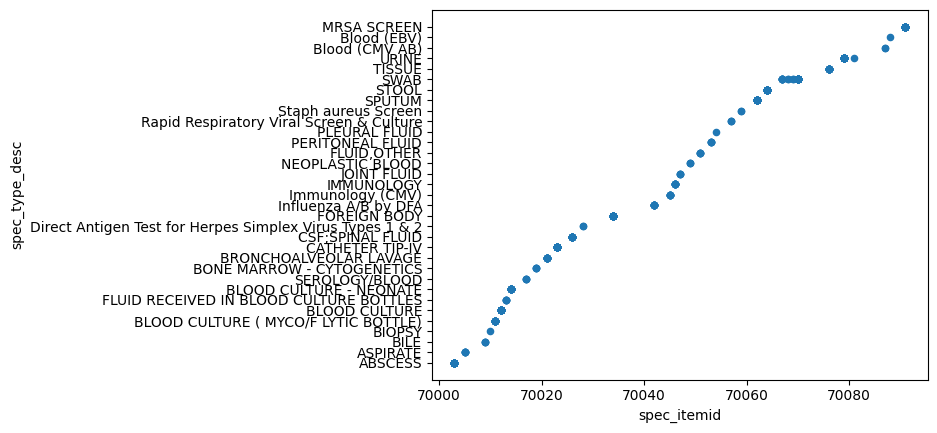

In [35]:
sample.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<Axes: xlabel='spec_itemid', ylabel='spec_type_desc'>

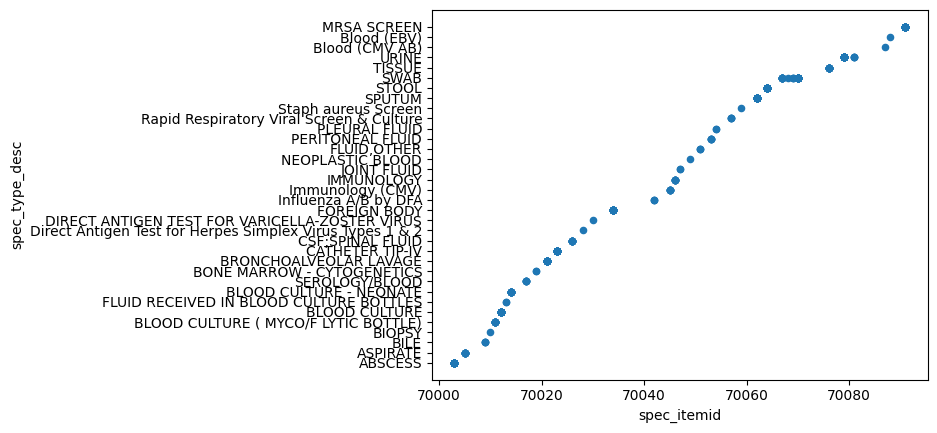

In [36]:
train_data.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<Axes: >

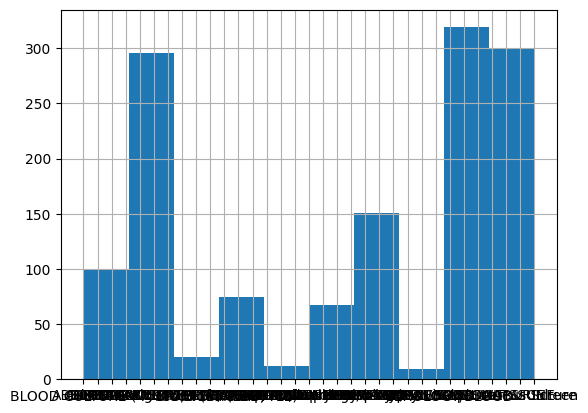

In [37]:
sample.sort_values('spec_type_desc')['spec_type_desc'].hist()

<Axes: >

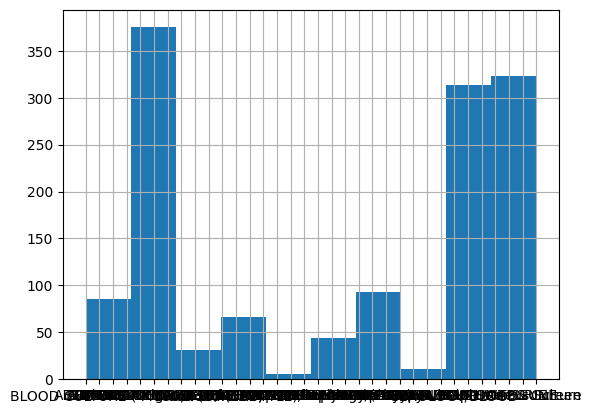

In [38]:
train_data.sort_values('spec_type_desc')['spec_type_desc'].hist()

In [39]:
# evaluate(sample, train_data, aggregate=False)

<Axes: >

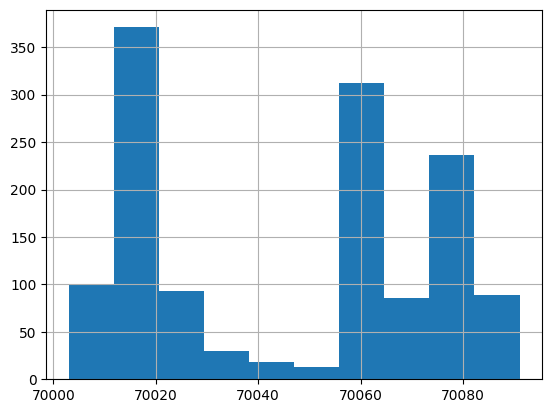

In [40]:
train_data.sort_values('spec_itemid')['spec_itemid'].hist()

<Axes: >

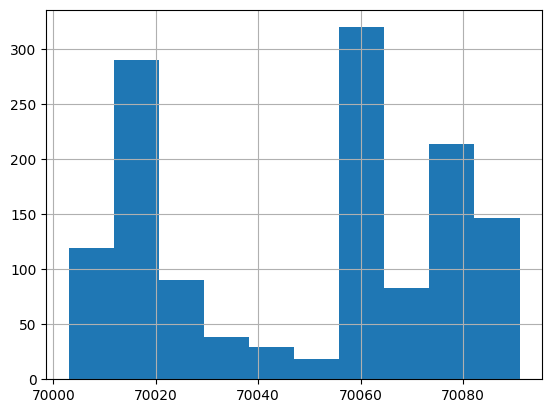

In [41]:
sample.sort_values('spec_itemid')['spec_itemid'].hist()